In [137]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [138]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [139]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [140]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [141]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [142]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [143]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [144]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [145]:
# Find the most recent date in the data set.
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
last_date

('2017-08-23')

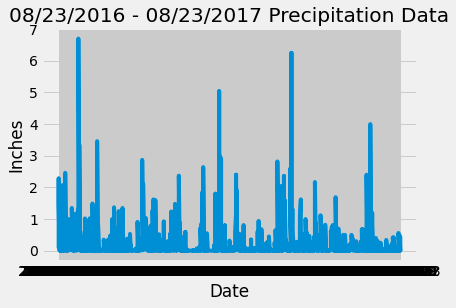

In [149]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > year_ago).order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation = pd.DataFrame(precipitation_data, columns=['date', 'prcp'])

# Sort the dataframe by date
precipitation = precipitation.set_index('date')
precipitation = precipitation.dropna()


# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(precipitation)
plt.title('08/23/2016 - 08/23/2017 Precipitation Data')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()



In [91]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [92]:
# Design a query to calculate the total number stations in the dataset
station_num = session.query(station).count()
print(f'There are {station_num} stations.')

There are 9 stations.


In [96]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station))\
    .group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [134]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_id = active_stations[0][0]

low_temp = session.query(func.min(measurement.tobs)).filter(measurement.station == active_id).all()
high_temp = session.query(func.max(measurement.tobs)).filter(measurement.station == active_id).all()
avg_temp = session.query(func.avg(measurement.tobs)).filter(measurement.station == active_id).all()

print(f'Min Temp: {low_temp[0][0]}(F)')
print(f'Max Temp: {high_temp[0][0]}(F)')
print(f'Avg Temp: {round(avg_temp[0][0],1)}(F)')

Min Temp: 54.0(F)
Max Temp: 85.0(F)
Avg Temp: 71.7(F)


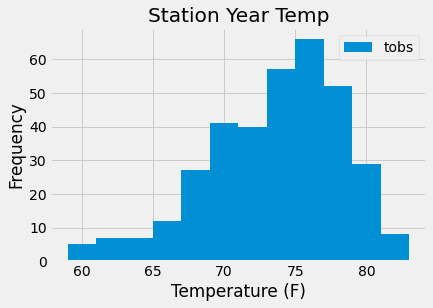

In [155]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_temp = session.query(measurement.date, measurement.tobs).filter(measurement.date > year_ago).filter(measurement.station == active_id).order_by(measurement.date).all()
station_temp = pd.DataFrame(year_temp, columns=['date', 'tobs'])
station_temp = station_temp.set_index('date')
station_temp = station_temp.dropna()

station_temp.plot(kind = 'hist', bins = 12)
plt.title('Station Year Temp')
plt.xlabel('Temperature (F)')
plt.show()


# Close session

In [ ]:
# Close Session
session.close()